# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, test ROOT installation with a simple example

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [7]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxft-dev is already the newest version (2.3.2-1).
libxpm-dev is already the newest version (1:3.5.12-1).
subversion is already the newest version (1.9.7-4ubuntu1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
tar is already the newest version (1.29b-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


### 2. Mount the drive to get the root binary and untar it 

In [8]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shared drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb
BasicPyROOTExample.ipynb  monje-a-lo-bonzo-blanco-y-negro.png
Chi2Fitting.ipynb	  piano-C5.wav
Data5.root		  Random2DHistos
FFT_imagen.ipynb	  root_build_google_yikes.tar
FFT.ipynb		  TrimmedTree.root
FLUTEMI.WAV		  TTreeExcercise.ipynb


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [11]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Nov  6 16:17 sample_data
drwx------  4 root root 4.0K Nov 10 04:52 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [13]:
import ROOT

Welcome to JupyROOT 6.14/04


In [0]:
BackgroundModel = ROOT.TH1F( 'bkg', 'My background model', 20, 50, 1050 )

In [0]:
expde = ROOT.TF1("expde","([2]*expo)+[3]",50,1050)
expde.SetParameters(0.0,-0.005,100,0.0);

In [0]:
BackgroundModel.FillRandom("expde",100000)

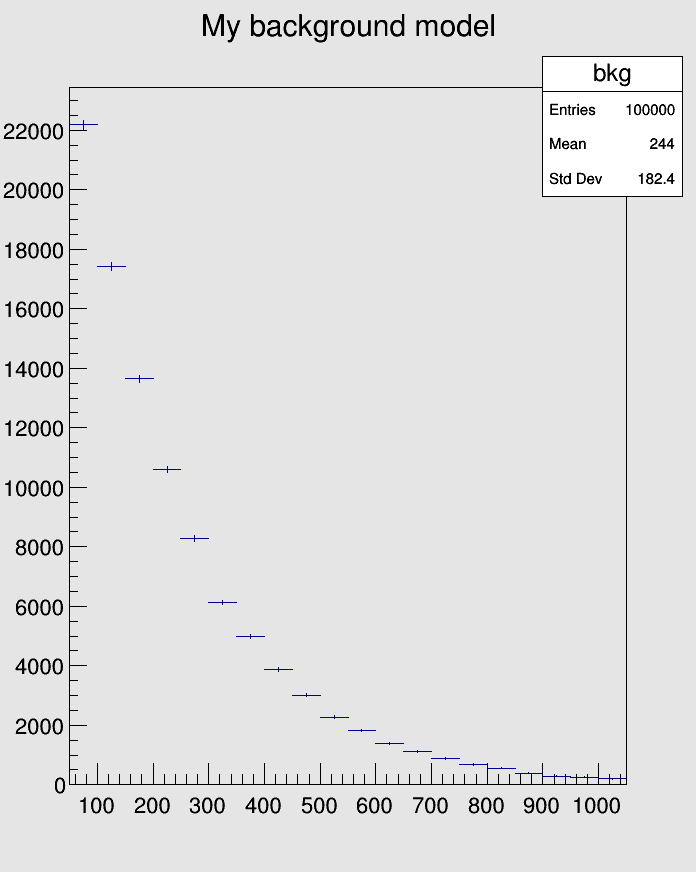

In [17]:
c1 = ROOT.TCanvas( 'c1', 'My First Data example', 200, 10, 700, 900 )
c1.SetFillColor( 18 )
BackgroundModel.Draw('E')
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

In [0]:
SignalModel = ROOT.TH1F( 'sig', 'My signal model', 20, 50, 1050 )

In [0]:
signal = ROOT.TF1("signal", "gaus", 50, 1050)
signal.SetParameters(1.0,500.0,50.0)

In [0]:
SignalModel.FillRandom("signal",1000)

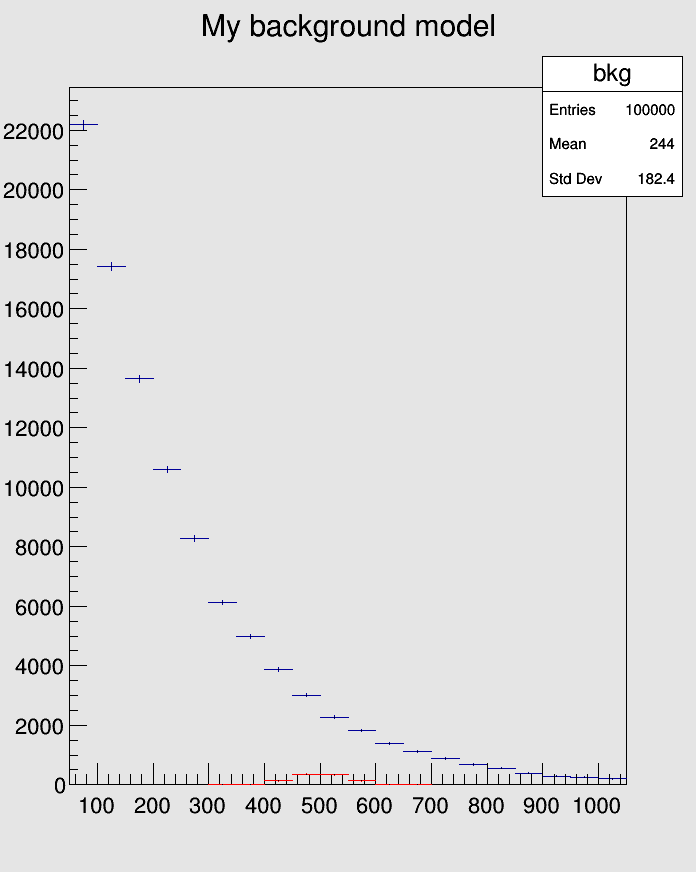

In [21]:
SignalModel.Draw('same E')
SignalModel.SetLineColor(2)
c1.Update()
gROOT.GetListOfCanvases().Draw()

In [0]:
BkgpSigModel = BackgroundModel.Clone("bkgpsig")

In [23]:
BkgpSigModel.Sumw2()
BkgpSigModel.Add(SignalModel,10)

True

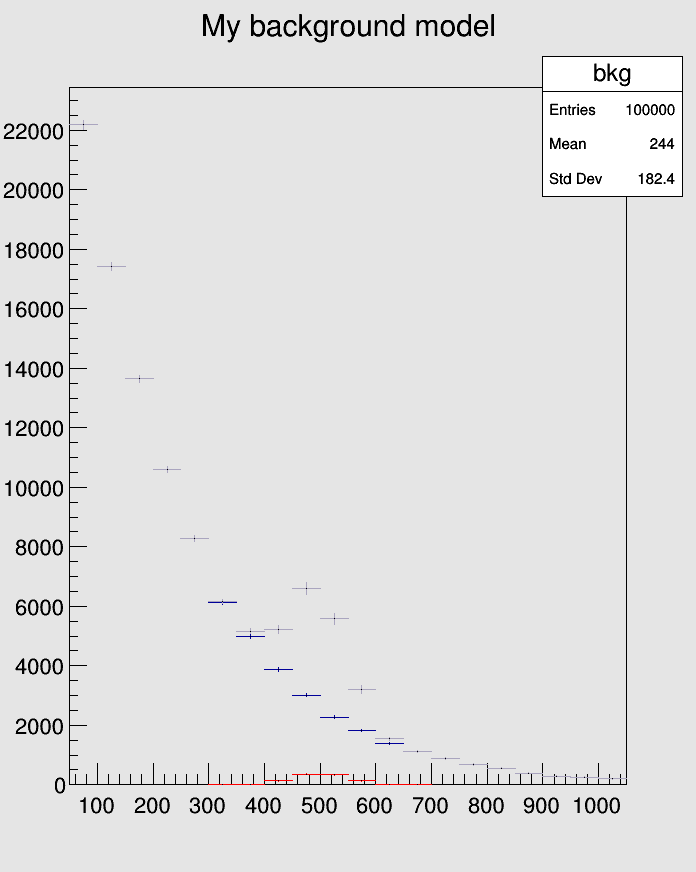

In [24]:
BkgpSigModel.SetLineColor(40)
BackgroundModel.Draw("E")
SignalModel.Draw("E same")
BkgpSigModel.Draw("E same")
c1.Update()
gROOT.GetListOfCanvases().Draw()

In [0]:
DataFile = ROOT.TFile("/content/drive/Shared drives/PyROOT_in_Google/Data5.root","read")

In [0]:
DataHisto=DataFile.Get('data')

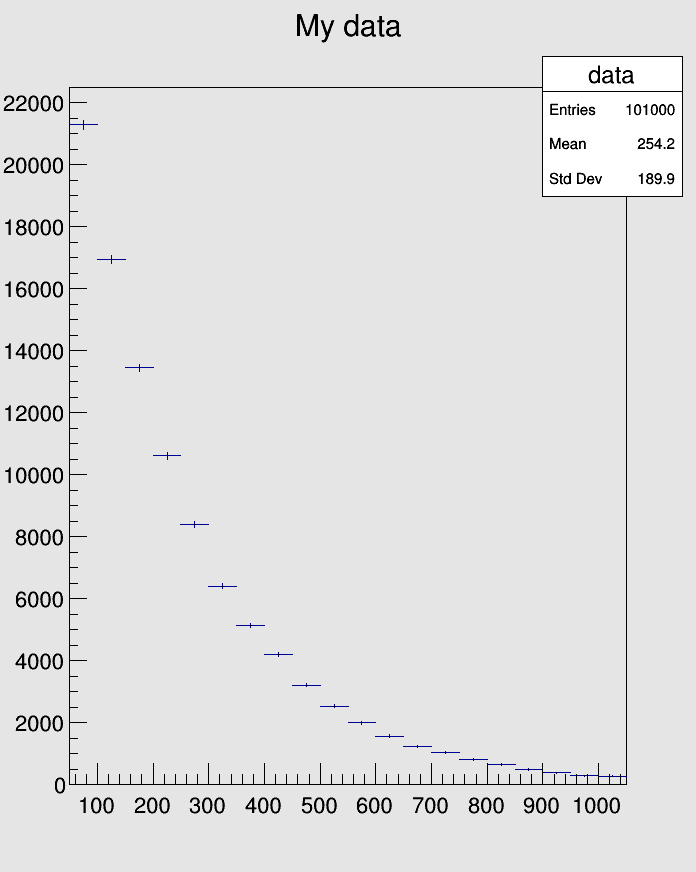

In [27]:
DataHisto.Draw("E")
c1.Update()
gROOT.GetListOfCanvases().Draw()

[47471081.3997337, 47466053.54395642, 47418425.6089908, 47265061.906103306, 47224086.074532814, 47207255.75627973, 47537968.010165416, 48463779.66876153, 49984690.732068114, 52100701.20008512, 20309885.820066918, 490697057.65330744]


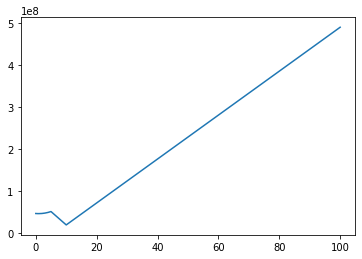

In [28]:
import matplotlib.pyplot as plt

FullChi2 = [] # Sum (Data-Model)**2/Data
chi12 = []
SignalNormalization = [0.001,0.01,0.1,0.5,0.7,1,2,3,4,5,10,100]
for i in SignalNormalization:
  BkgpSigModelTemp = BackgroundModel.Clone("bkgpsig"+str(i))
  BkgpSigModelTemp.Sumw2()
  BkgpSigModelTemp.Add(SignalModel,i)
  chi2=0.0
  chi12=0.0
  for j in range(DataHisto.GetNbinsX()+1):
      if DataHisto.GetBinContent(j)!=0: 
         chi2+=((DataHisto.GetBinContent(j)-BkgpSigModelTemp.GetBinContent(j))**2)/DataHisto.GetBinContent(j)
         if (DataHisto.GetBinContent(j)>=((DataHisto.GetBinContent(j)-BkgpSigModelTemp.GetBinContent(j))**2)/DataHisto.GetBinContent(j) and DataHisto.GetBinContent(j)<=((DataHisto.GetBinContent(j)+BkgpSigModelTemp.GetBinContent(j))**2)/DataHisto.GetBinContent(j)):
            chi2+=chi2
          
      
  FullChi2.append(chi2)
  
  
print(FullChi2)
plt.plot(SignalNormalization,FullChi2)
plt.show()